In [29]:
from model import ChoiceModel

def evaluate_gl(desire, choice_type, num_sample=1000, seed=42):
    print(f'Graph RAG+LLM: disire-{desire} choice_type-{choice_type} num_sample-{num_sample}')
    choice_model = ChoiceModel(
        data_dir='data', desire=desire, choice_type=choice_type,
        sample_num=num_sample, skip_init=True, seed=seed)

    error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=False)

    _,_,age_error_table = choice_model._get_error_table(x_label='age_group')
    _,_,income_error_table = choice_model._get_error_table(x_label='income_group')

    print('MAPE:', round(error['mean'],2))
    print('KL Divergence:', round(kl_divergence['mean'],2))
    print('=='*20)
    return age_error_table, income_error_table, error, kl_divergence

In [30]:
import pandas as pd

data = pd.DataFrame(columns=['num_sample','desire', 'choice_type', 'error', 'kl_divergence'])

In [31]:
desire = 'Eat'
choice_type = 'mode'

for i in range(0,11):
    num_sample = i*100
    print(num_sample)
    _, _, error, kl_divergence = evaluate_gl(desire, choice_type, num_sample=num_sample, seed=42)
    data.loc[len(data)] = [num_sample, desire, choice_type, error['mean'], kl_divergence['mean']]

data.head()

0
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-0
MAPE: 14.04
KL Divergence: 0.11
100
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-100
MAPE: 7.1
KL Divergence: 0.05
200
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-200
MAPE: 8.95
KL Divergence: 0.06
300
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-300
MAPE: 6.68
KL Divergence: 0.03
400
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-400
MAPE: 7.69
KL Divergence: 0.04
500
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-500
MAPE: 8.17
KL Divergence: 0.05
600
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-600
MAPE: 7.49
KL Divergence: 0.04
700
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-700
MAPE: 7.2
KL Divergence: 0.03
800
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-800
MAPE: 6.57
KL Divergence: 0.03
900
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-900
MAPE: 7.43
KL Divergence: 0.05
1000
Graph RAG+LLM: disire-Eat choice_type-mode num_sample-1000
MAPE: 5.55


,num_sample,desire,choice_type,error,kl_divergence
0,0,Eat,mode,14.041938,0.113463
1,100,Eat,mode,7.102241,0.046781
2,200,Eat,mode,8.951537,0.056319
3,300,Eat,mode,6.677702,0.034867
4,400,Eat,mode,7.686295,0.037384


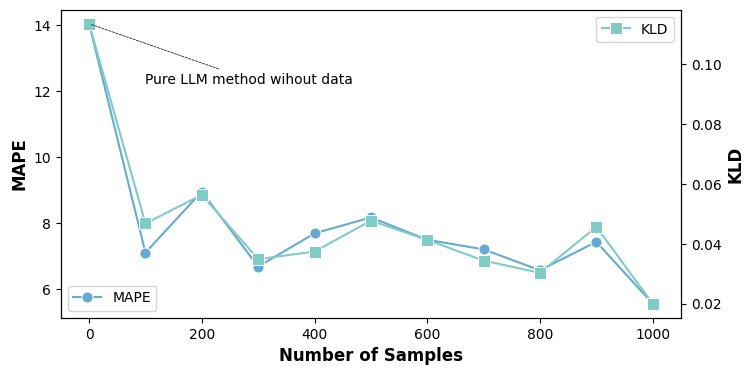

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()


# '#9ac4db','#aca1be'
# '#7E9BB7','#D6AFB9'

# custom_colors = ["#66AAD4","#deacb8","#bcebdf"]
custom_colors = ["#66AAD4","#80CBC4","#f7edc6"]
label_size = 12
tick_size=10

sns.lineplot(data=data, x='num_sample', y='error', ax=ax1,
             label='MAPE',marker='o',markersize=8,
             color=custom_colors[0])
sns.lineplot(data=data, x='num_sample', y='kl_divergence', ax=ax2, 
             label='KLD', marker='s',markersize=8,
             color=custom_colors[1])

ax1.set_xlabel('Number of Samples', fontsize=label_size,fontweight='bold')
ax1.set_ylabel('MAPE', fontsize=label_size,fontweight='bold')
ax1.legend(loc='lower left')
ax1.tick_params(axis='x', labelsize=tick_size)
ax1.tick_params(axis='y', labelsize=tick_size)

ax2.set_ylabel('KLD', fontsize=label_size,fontweight='bold')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelsize=tick_size)

# Adding an annotation with a connecting line
first_data_point = data.iloc[0]  # Get the first row of the data
x_coord = first_data_point['num_sample']
y_coord = first_data_point['kl_divergence']
annotation_text = 'Pure LLM method wihout data'
ax2.annotate(
    annotation_text, 
    xy=(x_coord, y_coord),  # Coordinates of the data point
    xytext=(x_coord+100, y_coord-0.02),  # Offset for the annotation text
    arrowprops=dict(
        arrowstyle='-',
        linestyle='--',   # Line style dashed
        color='black',   # Line color
        lw=0.5       # Line width
    ), 
    fontsize=10
)
plt.savefig('results/num_sample.png')
plt.show()

In [33]:
data

,num_sample,desire,choice_type,error,kl_divergence
0,0,Eat,mode,14.041938,0.113463
1,100,Eat,mode,7.102241,0.046781
2,200,Eat,mode,8.951537,0.056319
3,300,Eat,mode,6.677702,0.034867
4,400,Eat,mode,7.686295,0.037384
5,500,Eat,mode,8.169239,0.047718
6,600,Eat,mode,7.491728,0.041271
7,700,Eat,mode,7.200142,0.034379
8,800,Eat,mode,6.566530,0.030286
9,900,Eat,mode,7.429400,0.045649
